**SET UP THE NECESSARY LIBRARY**

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.9/871.9 kB 21.6 MB/s eta 0:00:00


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import ultralytics
import numpy as np
import random
import yaml
import cv2
import os

from IPython.display import display, Image
from IPython.display import Video
from IPython import display
from ultralytics import YOLO
from PIL import Image

ultralytics.checks()

Ultralytics YOLOv8.2.92 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.2/112.6 GB disk)


**MOUNT DRIVE**

In [4]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20

/content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20


In [ ]:
!ls

 data		   person_data.yaml  'Predicted Inference'    yolov8l.pt   yolov8n.pt
'Learning Curve'   Person_v20.ipynb  'Validation Inference'   yolov8m.pt


**BUILD THE MODEL FROM SCRATCH AND TRANSFER THE WEIGHTS**
---



In [ ]:

model = YOLO('yolov8m.yaml').load('yolov8m.pt')  # build from YAML and transfer weights


Transferred 475/475 items from pretrained weights


**DATASET EXPLORATION**
---



In [3]:

# Define the dataset_path
dataset_path = '/content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data'

# Set the path to the YAML file
yaml_file_path = os.path.join('/content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/person_v20_data.yaml')

# Load and print the contents of the YAML file
with open(yaml_file_path, 'r') as file:
    yaml_content = yaml.load(file, Loader=yaml.FullLoader)
    print(yaml.dump(yaml_content, default_flow_style=False))


names:
- Hasan
- Mahira
- Shakib
- Torik
nc: 4
roboflow:
  license: CC BY 4.0
  project: person-identification-test-data
  url: https://universe.roboflow.com/face-not-detected/person-identification-test-data/dataset/12
  version: 12
  workspace: face-not-detected
test: /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/test/images
train: /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/train/images
val: /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/valid/images



In [ ]:

# Set paths for training and validation image sets
train_images_path = os.path.join('/content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/train/images')
valid_images_path = os.path.join('/content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/valid/images')

# Initialize counters for the number of images
num_train_images = 0
num_valid_images = 0

# Initialize sets to hold the unique sizes of images
train_image_sizes = set()
valid_image_sizes = set()

# Check train images sizes and count
for filename in os.listdir(train_images_path):
    if filename.endswith('.jpg'):
        num_train_images += 1
        image_path = os.path.join(train_images_path, filename)
        with Image.open(image_path) as img:
            train_image_sizes.add(img.size)

# Check validation images sizes and count
for filename in os.listdir(valid_images_path):
    if filename.endswith('.jpg'):
        num_valid_images += 1
        image_path = os.path.join(valid_images_path, filename)
        with Image.open(image_path) as img:
            valid_image_sizes.add(img.size)

# Print the results
print(f"Number of training images: {num_train_images}")
print(f"Number of validation images: {num_valid_images}")

# Check if all images in training set have the same size
if len(train_image_sizes) == 1:
    print(f"All training images have the same size: {train_image_sizes.pop()}")
else:
    print("Training images have varying sizes.")

# Check if all images in validation set have the same size
if len(valid_image_sizes) == 1:
    print(f"All validation images have the same size: {valid_image_sizes.pop()}")
else:
    print("Validation images have varying sizes.")


Number of training images: 2388
Number of validation images: 200
All training images have the same size: (640, 640)
All validation images have the same size: (640, 640)


**TRAIN THE MODEL ON OUR CUSTOM DATASET**
---
# **Fine-tuning the mdoel**


In [ ]:

#Train the model on our custom dataset

results = model.train(
    data=yaml_file_path,     # Path to the dataset configuration file
    epochs=50,              # Number of epochs to train for
    imgsz=640,               # Size of input images as integer
    patience=50,             # Epochs to wait for no observable improvement for early stopping of training
    batch=32,                # Number of images per batch
    optimizer='auto',        # Optimizer to use, choices=[SGD, Adam, Adamax, AdamW, NAdam, RAdam, RMSProp, auto]
    lr0=0.0001,              # Initial learning rate
    lrf=0.1,                 # Final learning rate (lr0 * lrf)
    dropout=0.1,             # Use dropout regularization
    seed=0,                   # Random seed for reproducibility

    plots=True
)


Ultralytics YOLOv8.2.90 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.yaml, data=/content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/person_v20_data.yaml, epochs=50, time=None, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=yolov8m.pt, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.1, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_

100%|██████████| 755k/755k [00:00<00:00, 27.6MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

train: Scanning /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/train/labels... 2388 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2388/2388 [17:00<00:00,  2.34it/s]


train: New cache created: /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/valid/labels... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [01:28<00:00,  2.27it/s]

val: New cache created: /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      13.7G      1.427      2.645      1.582         37        640: 100%|██████████| 75/75 [01:23<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.32s/it]

                   all        200        229      0.433      0.329      0.293      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      13.5G      1.447      1.796      1.583         32        640: 100%|██████████| 75/75 [01:22<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]

                   all        200        229      0.463      0.539      0.487      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      13.1G      1.435      1.675      1.568         35        640: 100%|██████████| 75/75 [01:21<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]

                   all        200        229      0.216      0.285       0.11     0.0552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      13.5G      1.441      1.665      1.576         32        640: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.09it/s]

                   all        200        229      0.592       0.42      0.472        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      13.1G        1.4      1.553      1.528         37        640: 100%|██████████| 75/75 [01:21<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]

                   all        200        229      0.746      0.572      0.663      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      13.5G      1.349      1.425        1.5         30        640: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.24s/it]

                   all        200        229      0.788      0.666      0.747      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      13.1G      1.291      1.298      1.464         42        640: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        200        229      0.768      0.767      0.838      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      13.5G      1.272      1.231       1.44         50        640: 100%|██████████| 75/75 [01:20<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        200        229      0.809      0.706      0.789      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      13.1G      1.239      1.181      1.402         49        640: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.20s/it]

                   all        200        229      0.908      0.827      0.915      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      13.5G      1.186       1.11      1.369         38        640: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.10it/s]

                   all        200        229      0.855      0.779      0.865      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      13.1G       1.17      1.076      1.365         43        640: 100%|██████████| 75/75 [01:20<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.07it/s]

                   all        200        229       0.92      0.828      0.924      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      13.5G      1.163       1.02      1.351         40        640: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.09s/it]

                   all        200        229      0.932      0.867      0.945      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      13.1G      1.134     0.9986      1.316         27        640: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]

                   all        200        229      0.893      0.849      0.945       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      13.5G      1.124     0.9794       1.31         43        640: 100%|██████████| 75/75 [01:21<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.10s/it]

                   all        200        229      0.864      0.866       0.93      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      13.1G      1.097     0.9485      1.302         39        640: 100%|██████████| 75/75 [01:19<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]

                   all        200        229      0.891      0.906      0.946      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      13.5G      1.094     0.8995      1.289         46        640: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        200        229      0.882      0.892      0.936      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      13.1G      1.069     0.8978      1.286         32        640: 100%|██████████| 75/75 [01:20<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.27s/it]

                   all        200        229        0.9      0.922      0.945      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      13.5G      1.036     0.8611      1.264         49        640: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]

                   all        200        229      0.905      0.896      0.936      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      13.1G      1.039     0.8213      1.261         42        640: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]

                   all        200        229      0.926      0.839      0.943      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      13.5G      1.022     0.8264      1.249         38        640: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.15s/it]


                   all        200        229      0.879      0.922      0.949      0.694

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      13.1G      1.025     0.7909      1.266         41        640: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.34it/s]

                   all        200        229      0.928      0.911      0.958      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      13.5G      1.006     0.7823      1.238         32        640: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.03it/s]

                   all        200        229       0.94      0.862      0.953      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      13.1G     0.9889     0.7622      1.217         45        640: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.02s/it]

                   all        200        229      0.944      0.912      0.959      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      13.5G     0.9834     0.7566      1.218         37        640: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]

                   all        200        229      0.956        0.9      0.961      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      13.1G     0.9833     0.7357      1.216         55        640: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.13s/it]

                   all        200        229      0.917      0.917      0.948        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      13.5G     0.9589     0.7219      1.203         38        640: 100%|██████████| 75/75 [01:19<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]

                   all        200        229      0.964      0.909      0.961      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      13.1G     0.9531     0.7421      1.202         36        640: 100%|██████████| 75/75 [01:21<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.20s/it]

                   all        200        229      0.954      0.877      0.953      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      13.5G     0.9346     0.6837      1.197         42        640: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]

                   all        200        229      0.877      0.906      0.947      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      13.1G     0.9264      0.683      1.179         37        640: 100%|██████████| 75/75 [01:20<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.04it/s]

                   all        200        229      0.961      0.912      0.963      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      13.5G     0.9177     0.6584      1.171         42        640: 100%|██████████| 75/75 [01:20<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]

                   all        200        229      0.964       0.94      0.969      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      13.1G     0.9023     0.6232      1.163         36        640: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.35it/s]

                   all        200        229      0.938      0.928      0.957      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      13.5G     0.9072     0.6252      1.169         47        640: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.08s/it]

                   all        200        229      0.964      0.927      0.963      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      13.1G     0.8896     0.6254      1.155         49        640: 100%|██████████| 75/75 [01:21<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]

                   all        200        229      0.971       0.92      0.965       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      13.5G     0.9004     0.6218      1.164         50        640: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.13s/it]

                   all        200        229      0.957      0.931      0.961      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      13.1G     0.8753     0.5958       1.15         40        640: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.35it/s]

                   all        200        229      0.965       0.93      0.966      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      13.5G      0.862     0.5892      1.149         47        640: 100%|██████████| 75/75 [01:21<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.04it/s]

                   all        200        229      0.957      0.939      0.968      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      13.1G     0.8493     0.5722      1.138         41        640: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        200        229      0.967      0.918      0.963      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      13.5G     0.8409     0.5628      1.136         42        640: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.11it/s]

                   all        200        229      0.976      0.943       0.97      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      13.1G     0.8316     0.5538      1.128         40        640: 100%|██████████| 75/75 [01:20<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]

                   all        200        229      0.952      0.948      0.966      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      13.5G     0.8396     0.5506      1.129         39        640: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]

                   all        200        229      0.957      0.944      0.969      0.756


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      13.1G     0.7671     0.4145      1.091         20        640: 100%|██████████| 75/75 [01:21<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.11s/it]

                   all        200        229      0.953      0.922      0.967      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      13.5G     0.7615     0.4031      1.082         26        640: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]

                   all        200        229      0.948      0.939      0.967      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      13.1G     0.7417     0.3829       1.07         25        640: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]

                   all        200        229      0.975       0.92      0.971      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      13.5G     0.7228     0.3723      1.053         22        640: 100%|██████████| 75/75 [01:19<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.04it/s]

                   all        200        229      0.966       0.93      0.966      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      13.1G     0.7099     0.3608       1.05         20        640: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.34it/s]

                   all        200        229      0.979      0.903      0.965      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      13.5G     0.7037      0.358      1.049         22        640: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.06s/it]

                   all        200        229      0.947      0.924      0.968      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      13.1G     0.6949     0.3477      1.038         20        640: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]

                   all        200        229      0.961      0.936      0.967      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      13.5G      0.677     0.3327      1.019         24        640: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        200        229       0.96      0.938      0.963      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      13.1G     0.6738     0.3316      1.023         23        640: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.08it/s]

                   all        200        229      0.955      0.933       0.97      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      13.5G     0.6468     0.3146      1.008         22        640: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.17it/s]

                   all        200        229      0.951      0.928      0.971      0.778



50 epochs completed in 1.191 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.90 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m summary (fused): 218 layers, 25,842,076 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.48s/it]


                   all        200        229      0.951      0.928      0.971      0.778
                 Hasan         52         52      0.923       0.92      0.978      0.799
                Mahira         72         72      0.943      0.958      0.989      0.769
                Shakib         67         67      0.952       0.94      0.973      0.779
                 Torik         38         38      0.987      0.895      0.946      0.767
Speed: 0.2ms preprocess, 10.4ms inference, 0.0ms loss, 4.5ms postprocess per image
Results saved to runs/detect/train


**MODEL PERFORMANCE EVALUATION**
---
**1. List of generated files**


In [ ]:

%cd /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/runs/detect/train



/content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/runs/detect/train


**2. Learning Curve Analysis**

In [ ]:

# Define a function to plot learning curves for loss values
def plot_learning_curve(df, train_loss_col, val_loss_col, title):
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=df, x='epoch', y=train_loss_col, label='Train Loss', color='#141140', linestyle='-', linewidth=2)
    sns.lineplot(data=df, x='epoch', y=val_loss_col, label='Validation Loss', color='orangered', linestyle='--', linewidth=2)
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


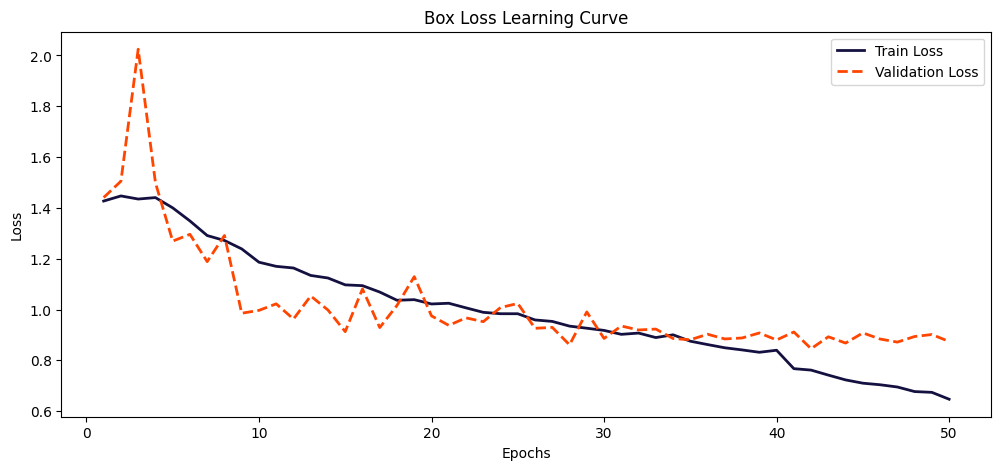

<Figure size 640x480 with 0 Axes>

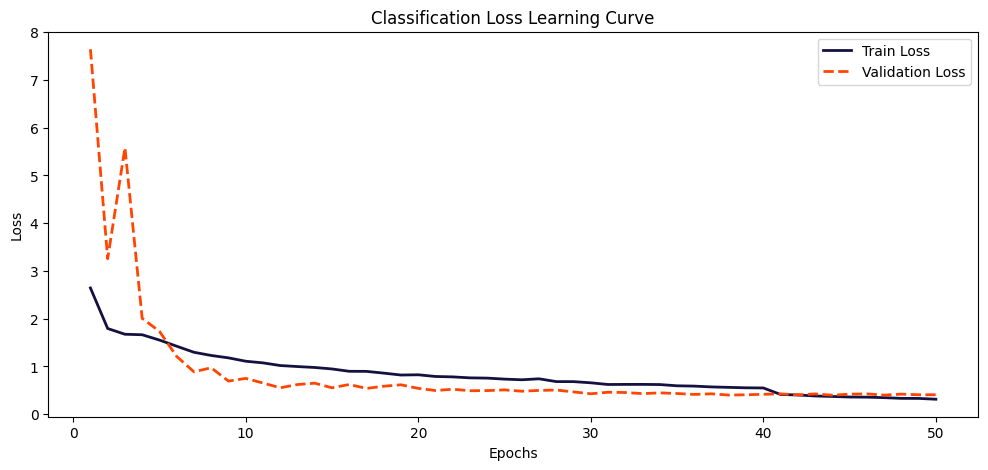

<Figure size 640x480 with 0 Axes>

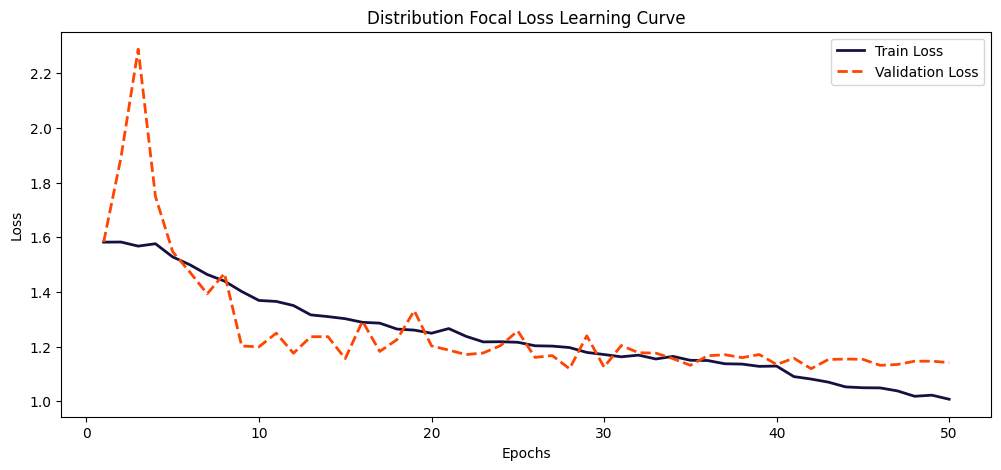

<Figure size 640x480 with 0 Axes>

In [ ]:

# Create the full file path for 'results.csv' using the directory path and file name
results_csv_path = os.path.join('/content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/runs/detect/train', 'results.csv')

# Load the CSV file from the constructed path into a pandas DataFrame
df = pd.read_csv(results_csv_path)

# Remove any leading whitespace from the column names
df.columns = df.columns.str.strip()

# Plot the learning curves for each loss
plot_learning_curve(df, 'train/box_loss', 'val/box_loss', 'Box Loss Learning Curve')
plt.savefig(os.path.join('/content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/Learning Curve', 'box_loss_learning_curve.png'))

plot_learning_curve(df, 'train/cls_loss', 'val/cls_loss', 'Classification Loss Learning Curve')
plt.savefig(os.path.join('/content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/Learning Curve', 'classification_loss_learning_curve.png'))

plot_learning_curve(df, 'train/dfl_loss', 'val/dfl_loss', 'Distribution Focal Loss Learning Curve')
plt.savefig(os.path.join('/content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/Learning Curve', 'distribution_focal_loss_learning_curve.png'))

# Show the plots
plt.show()


**3. Confusion Matrix Evaluation**

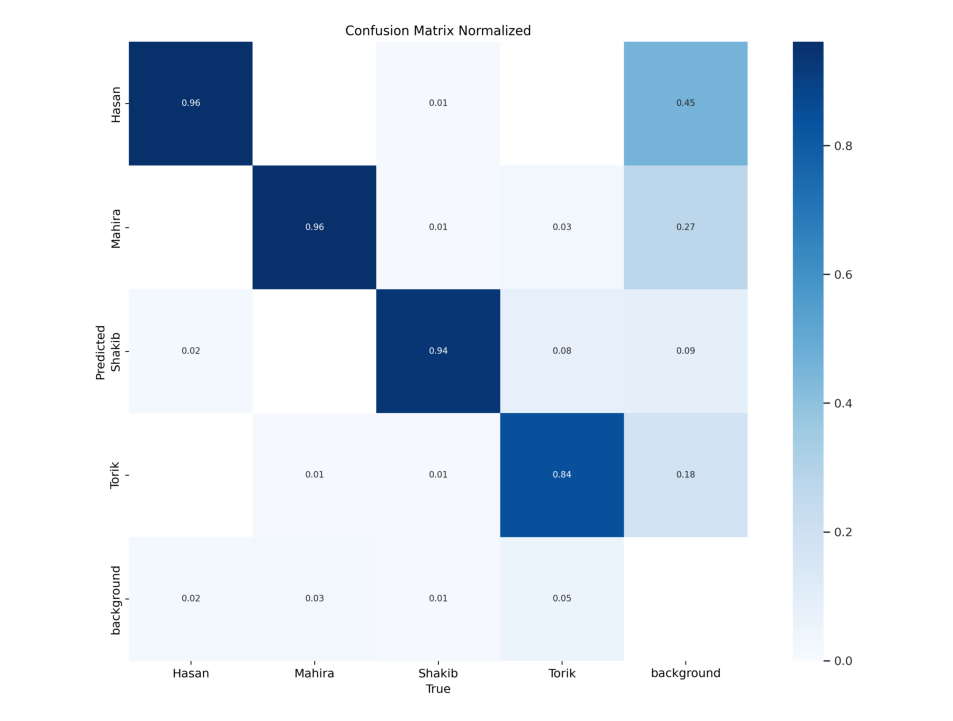

In [ ]:

# Construct the path to the normalized confusion matrix image
confusion_matrix_path = os.path.join('/content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/runs/detect/train', 'confusion_matrix_normalized.png')

# Read the image using cv2
cm_img = cv2.imread(confusion_matrix_path)

# Convert the image from BGR to RGB color space for accurate color representation with matplotlib
cm_img = cv2.cvtColor(cm_img, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(10, 10), dpi=120)
plt.imshow(cm_img)
plt.axis('off')
plt.show()


**4. Performance Metrics Assessment**

In [ ]:

%cd /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20
# Construct the path to the best model weights file using os.path.join
best_model_path = os.path.join('/content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/runs/detect/train', 'weights/best.pt')

# Load the best model weights into the YOLO model
best_model = YOLO(best_model_path)

# Validate the best model using the validation set with default parameters
metrics = best_model.val(plots=True, split='val')


/content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20
Ultralytics YOLOv8.2.90 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m summary (fused): 218 layers, 25,842,076 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/valid/labels.cache... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:12<00:00,  1.03it/s]


                   all        200        229      0.951      0.928      0.971      0.777
                 Hasan         52         52      0.923      0.919      0.978        0.8
                Mahira         72         72      0.943      0.958      0.989      0.769
                Shakib         67         67      0.952       0.94      0.973      0.779
                 Torik         38         38      0.987      0.895      0.945      0.761
Speed: 0.5ms preprocess, 23.7ms inference, 0.0ms loss, 10.8ms postprocess per image
Results saved to runs/detect/val


In [ ]:

# Convert the dictionary to a pandas DataFrame and use the keys as the index
metrics_df = pd.DataFrame.from_dict(metrics.results_dict, orient='index', columns=['Metric Value'])

# Display the DataFrame
metrics_df.round(3)


,Metric Value
metrics/precision(B),0.951
metrics/recall(B),0.928
metrics/mAP50(B),0.971
metrics/mAP50-95(B),0.777
fitness,0.797


**MODEL INFERENCE & GENERALIZATION ASSESMENT**
---
**1. Inference on Validation Set Images**


image 1/1 /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/valid/images/177_jpg.rf.d16f699a3b2a1e1c5a520c5046f47447.jpg: 640x640 1 Mahira, 37.1ms
Speed: 1.9ms preprocess, 37.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/valid/images/1650_jpg.rf.4ff71a3468ca3e2cef477ce07fb738ad.jpg: 640x640 1 Shakib, 37.0ms
Speed: 1.6ms preprocess, 37.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/valid/images/1527_jpg.rf.bc75c664139127eaabfb8bf94d41a16c.jpg: 640x640 1 Torik, 37.0ms
Speed: 1.6ms preprocess, 37.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/valid/images/1186_jpg.rf.ca13c29674efab92e672f613c0667eec.jpg: 640x640 1 Shakib, 37.0ms
Speed: 1.5ms preprocess, 37.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640

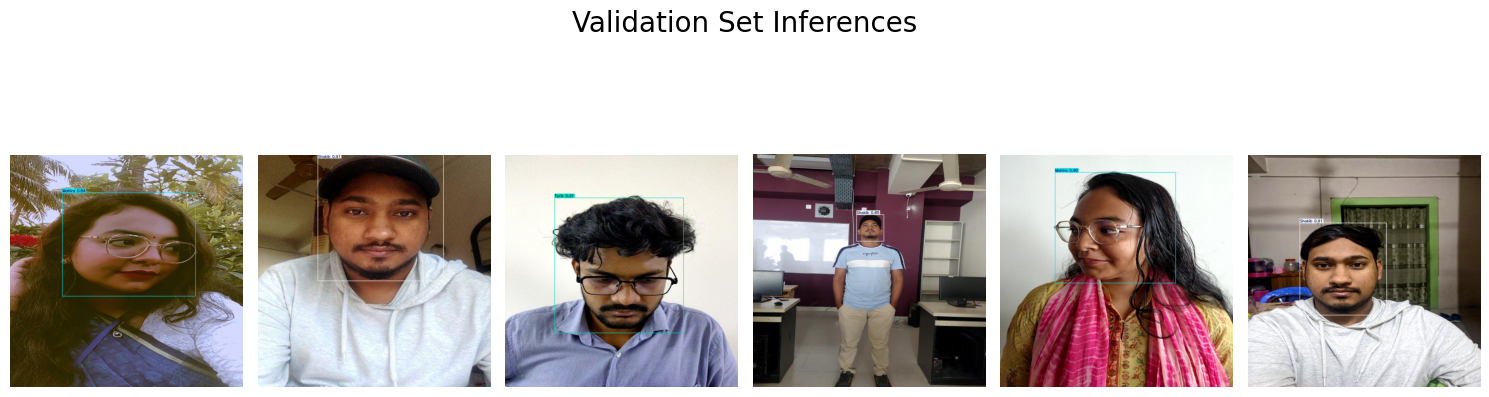

In [ ]:

# Define the path to the validation images
valid_images_path = os.path.join('/content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data', 'valid', 'images')

# List all jpg images in the directory
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

# Select 9 images at equal intervals
num_images = min(6, len(image_files))  # 6 desired number of images
selected_images = random.sample(image_files, num_images)

# Initialize the subplot
fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
fig.suptitle('Validation Set Inferences', fontsize=20)

# Perform inference on each selected image and display it
for i, ax in enumerate(axes.flatten()):
    image_path = os.path.join(valid_images_path, selected_images[i])
    results = best_model.predict(source=image_path, imgsz=640, conf=0.5)
    annotated_image = results[0].plot(line_width=1)
    annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
    ax.imshow(annotated_image_rgb)
    ax.axis('off')

# Save the plot to a file
plt.savefig('/content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/Validation Inference/validation_inferences.png')

plt.tight_layout()
plt.show()


**2. Inference on an Unseen Test Image**

In [ ]:

%cd /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20
# Construct the path to the best model weights file using os.path.join
best_model_path = os.path.join('/content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/runs/detect/train', 'weights/best.pt')

# Load the best model weights into the YOLO model
best_model = YOLO(best_model_path)

# Run inference on 'Test data' with arguments
results= best_model.predict('/content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/test/images', conf=0.5, iou=0.7, save=True, save_txt= True)


/content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20

image 1/52 /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/test/images/1-1-_jpeg.rf.274c23f29b297ae948f94e56478af2a4.jpg: 640x320 1 Torik, 201.0ms
image 2/52 /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/test/images/1-1-_jpg.rf.ec531f96082de15e1e96b074e5f13806.jpg: 640x512 1 Hasan, 67.3ms
image 3/52 /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/test/images/1-34-_jpg.rf.6d4f69df2c2e3676f8b28c3ed5e333e3.jpg: 640x480 1 Hasan, 63.9ms
image 4/52 /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/test/images/1-35-_jpg.rf.f12b8d07e1e69fb6a4ba786820430b09.jpg: 640x448 1 Hasan, 68.5ms
image 5/52 /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/test/images/1-36-_jpg.rf.0922e404c92896611f1292503d8c07b6.jpg: 448x640 1 Hasan, 69.5ms
image 6/52 /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/test/images/1-37-_jpg.rf.8d883f6642bf2243c3924c8f8de16d8c.jpg: 448x640 1 Hasan, 27.4ms
image 7/52 /content/drive/MyDri

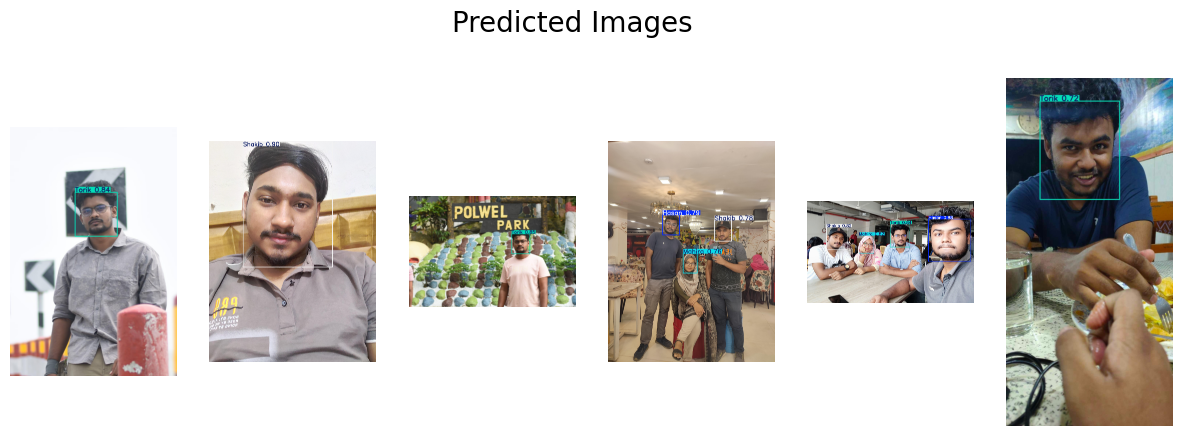

In [ ]:

# Path to the folder containing your test images
tested_images_path = '/content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/runs/detect/predict'

# List all image files in the directory
image_files = [file for file in os.listdir(tested_images_path) if file.endswith(('.jpg'))]

# Choose a random subset of images for plotting (adjust as needed)
num_images_to_plot = min(6, len(image_files))  # 6 desired number of images
selected_images = random.sample(image_files, num_images_to_plot)

# Initialize the subplot
fig, axes = plt.subplots(1, num_images_to_plot, figsize=(15, 5))
fig.suptitle('Predicted Images', fontsize=20)

# Plot and save each selected image
for i, ax in enumerate(axes):
    image_path = os.path.join(tested_images_path, selected_images[i])

    # Load and display the image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(img_rgb)
    ax.axis('off')

# Save the plot to a file in a different drive folder
save_path = '/content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/Predicted Inference/Predicted_images.png'
plt.savefig(save_path)

# Show the plot
plt.show()


** Performance Metrics Assessment on Test Data**

In [ ]:

%cd /content/drive/MyDrive/YOLOv8 RESEARCH/Person_Final_v2
# Construct the path to the best model weights file using os.path.join
best_model_path = os.path.join('/content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/runs/detect/train', 'weights/best.pt')

# Load the best model weights into the YOLO model
best_model = YOLO(best_model_path)

# Validate the best model using the validation set with default parameters
metrics = best_model.val(plots=True, split='test')


[Errno 2] No such file or directory: '/content/drive/MyDrive/YOLOv8 RESEARCH/Person_Final_v2'
/content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20
Ultralytics YOLOv8.2.90 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m summary (fused): 218 layers, 25,842,076 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/test/labels... 52 images, 0 backgrounds, 0 corrupt: 100%|██████████| 52/52 [00:22<00:00,  2.27it/s]

val: New cache created: /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/test/labels.cache



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.45s/it]


                   all         52         66        0.8      0.847      0.804      0.502
                 Hasan         15         15       0.72      0.667      0.735      0.519
                Mahira         21         23      0.862       0.87      0.864      0.467
                Shakib         17         17      0.796      0.941      0.798      0.607
                 Torik         11         11      0.821      0.909      0.818      0.415
Speed: 0.7ms preprocess, 24.8ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/val2


In [ ]:

# Convert the dictionary to a pandas DataFrame and use the keys as the index
metrics_df = pd.DataFrame.from_dict(metrics.results_dict, orient='index', columns=['Metric Value'])

# Display the DataFrame
metrics_df.round(3)


,Metric Value
metrics/precision(B),0.800
metrics/recall(B),0.847
metrics/mAP50(B),0.804
metrics/mAP50-95(B),0.502
fitness,0.532


In [ ]:

result= results[0]


In [ ]:

len(result.boxes)


1

In [ ]:

box = result.boxes[0]


In [ ]:

for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    probs = result.probs  # Class probabilities for classification outputs


In [ ]:

boxes


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([2.], device='cuda:0')
conf: tensor([0.8198], device='cuda:0')
data: tensor([[319.0698, 215.9828, 719.9445, 683.9598,   0.8198,   2.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (1600, 1200)
shape: torch.Size([1, 6])
xywh: tensor([[519.5071, 449.9713, 400.8746, 467.9770]], device='cuda:0')
xywhn: tensor([[0.4329, 0.2812, 0.3341, 0.2925]], device='cuda:0')
xyxy: tensor([[319.0698, 215.9828, 719.9445, 683.9598]], device='cuda:0')
xyxyn: tensor([[0.2659, 0.1350, 0.6000, 0.4275]], device='cuda:0')

In [ ]:

cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)


Object type: 3.0
Coordinates: [186.3468017578125, 132.03851318359375, 622.260498046875, 673.807861328125]
Probability: 0.7196459770202637


In [ ]:

for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")


Object type: Shakib
Coordinates: [319, 216, 720, 684]
Probability: 0.82
---


**3.1 Inference on an Unseen Test Mahira Video**

In [6]:

%cd /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20
# Construct the path to the best model weights file using os.path.join
best_model_path = os.path.join('/content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/runs/detect/train_graph', 'weights/best.pt')

# Load the best model weights into the YOLO model
best_model = YOLO(best_model_path)

# Run inference on 'Test data' with arguments
results= best_model.predict('/content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/video/Mahira.mp4', conf=0.5, iou=0.7, save=True)


/content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20


WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/898) /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/video/Mahira.mp4: 640x384 (no detections), 108.6ms
video 1/1 (frame 2/898) /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/video/Mahira.mp4: 640x384 (no detections), 25.2ms
video 1/1 (frame 3/898) /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/video/Mahira.mp4: 640x384 (no detections), 25.1ms
video 1/1 (frame 4

In [ ]:

# Convert the .avi video generated by the YOLOv8 prediction to .mp4 format for compatibility with notebook display
!ffmpeg -y -loglevel panic -i /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/runs/detect/predict1/Mahira.avi processed_Mahira.mp4

# Embed and display the processed sample video within the notebook
Video("processed_Mahira.mp4", embed=True, width=960)


**3.2 Inference on an Unseen Test Shakib Video**

In [4]:

%cd /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20
# Construct the path to the best model weights file using os.path.join
best_model_path = os.path.join('/content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/runs/detect/train_graph/weights/best.pt')

# Load the best model weights into the YOLO model
best_model = YOLO(best_model_path)

# Run inference on 'Test data' with arguments
results= best_model.predict('/content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/video/Shakib.mp4', conf=0.5, iou=0.7, save=True)


/content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20


WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/1519) /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/video/Shakib.mp4: 640x448 1 Shakib, 101.6ms
video 1/1 (frame 2/1519) /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/video/Shakib.mp4: 640x448 1 Shakib, 27.3ms
video 1/1 (frame 3/1519) /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/video/Shakib.mp4: 640x448 1 Shakib, 27.3ms
video 1/1 (frame 4/1519) /content/dr

In [5]:

# Convert the .avi video generated by the YOLOv8 prediction to .mp4 format for compatibility with notebook display
!ffmpeg -y -loglevel panic -i /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/runs/detect/predict1/Shakib.avi processed_Shakib.mp4

# Embed and display the processed sample video within the notebook
Video("processed_Shakib.mp4", embed=True, width=960)


**3.3 Inference on an Unseen Test Hasan Video**

In [6]:

%cd /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20
# Construct the path to the best model weights file using os.path.join
best_model_path = os.path.join('/content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/runs/detect/train_graph/weights/best.pt')

# Load the best model weights into the YOLO model
best_model = YOLO(best_model_path)

# Run inference on 'Test data' with arguments
results= best_model.predict('/content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/video/Hasan.mp4', conf=0.5, iou=0.7, save=True)


/content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20


WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/1021) /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/video/Hasan.mp4: 640x384 1 Hasan, 189.8ms
video 1/1 (frame 2/1021) /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/video/Hasan.mp4: 640x384 1 Hasan, 25.2ms
video 1/1 (frame 3/1021) /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/video/Hasan.mp4: 640x384 1 Hasan, 30.5ms
video 1/1 (frame 4/1021) /content/drive/My

In [ ]:

# Convert the .avi video generated by the YOLOv8 prediction to .mp4 format for compatibility with notebook display
!ffmpeg -y -loglevel panic -i /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/runs/detect/predict1/Hasan.avi processed_Hasan.mp4

# Embed and display the processed sample video within the notebook
Video("processed_Hasan", embed=True, width=960)


**3.4 Inference on an Unseen Test Torik Video**

In [6]:

%cd /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20
# Construct the path to the best model weights file using os.path.join
best_model_path = os.path.join('/content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/runs/detect/train_graph/weights/best.pt')

# Load the best model weights into the YOLO model
best_model = YOLO(best_model_path)

# Run inference on 'Test data' with arguments
results= best_model.predict('/content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/video/Torik.mp4', conf=0.5, iou=0.7, save=True)


/content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20


WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/1306) /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/video/Torik.mp4: 640x384 (no detections), 140.3ms
video 1/1 (frame 2/1306) /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/video/Torik.mp4: 640x384 (no detections), 25.3ms
video 1/1 (frame 3/1306) /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/video/Torik.mp4: 640x384 (no detections), 25.2ms
video 1/1 (frame 4

In [ ]:

# Convert the .avi video generated by the YOLOv8 prediction to .mp4 format for compatibility with notebook display
!ffmpeg -y -loglevel panic -i /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/runs/detect/predict1/Torik.avi processed_Torik.mp4

# Embed and display the processed sample video within the notebook
Video("processed_Torik.mp4", embed=True, width=960)


**3.5 Inference on an Unseen Test Group1 Video**

In [ ]:

%cd /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20
# Construct the path to the best model weights file using os.path.join
best_model_path = os.path.join('/content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/runs/detect/train_graph', 'weights/best.pt')

# Load the best model weights into the YOLO model
best_model = YOLO(best_model_path)

# Run inference on 'Test data' with arguments
results= best_model.predict('/content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/video/Group_1.mp4', conf=0.5, iou=0.7, save=True)


In [ ]:

# Convert the .avi video generated by the YOLOv8 prediction to .mp4 format for compatibility with notebook display
!ffmpeg -y -loglevel panic -i /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/runs/detect/predict1/Group_1.avi processed_Group_1.mp4

# Embed and display the processed sample video within the notebook
Video("processed_Group_1.mp4", embed=True, width=960)


**3.6 Inference on an Unseen Test Group2 Video**

In [5]:

%cd /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20
# Construct the path to the best model weights file using os.path.join
best_model_path = os.path.join('/content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/runs/detect/train_graph/weights/best.pt')

# Load the best model weights into the YOLO model
best_model = YOLO(best_model_path)

# Run inference on 'Test data' with arguments
results= best_model.predict('/content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/video/Group_2_all.mp4', conf=0.5, iou=0.7, save=True)


/content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20


WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/1351) /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/video/Group_2_all.mp4: 288x640 1 Hasan, 107.7ms
video 1/1 (frame 2/1351) /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/video/Group_2_all.mp4: 288x640 1 Hasan, 21.9ms
video 1/1 (frame 3/1351) /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/video/Group_2_all.mp4: 288x640 1 Hasan, 21.8ms
video 1/1 (frame 4/1351)

In [ ]:

# Convert the .avi video generated by the YOLOv8 prediction to .mp4 format for compatibility with notebook display
!ffmpeg -y -loglevel panic -i /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/runs/detect/predict1/Group_2_all.avi processed_Group_2_all.mp4

# Embed and display the processed sample video within the notebook
Video("processed_Group_2_all.mp4", embed=True, width=960)


**4. Inference on an UnKnown Test Image**

In [ ]:

%cd /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20
# Construct the path to the best model weights file using os.path.join
best_model_path = os.path.join('/content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/runs/detect/train_graph', 'weights/best.pt')

# Load the best model weights into the YOLO model
best_model = YOLO(best_model_path)

# Run inference on 'Test data' with arguments
results= best_model.predict('/content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/unknown_test/images', conf=0.5, iou=0.7, save=True, save_txt= True)


/content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20

image 1/13 /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/unknown_test/images/1_png.rf.c77d28b84e13f6560f18f7de8b9ccefb.jpg: 640x640 (no detections), 37.1ms
image 2/13 /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/unknown_test/images/2_jpeg.rf.c1d08dcec141604bae4b61d6c3a7c0fe.jpg: 640x640 1 Torik, 37.1ms
image 3/13 /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/unknown_test/images/3_jpeg.rf.0af1a386b9a393f75fdf21652df79800.jpg: 640x640 (no detections), 37.1ms
image 4/13 /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/unknown_test/images/4_jpeg.rf.eee79cc25413b1f3e7b98eb67641af03.jpg: 640x640 1 Shakib, 1 Torik, 37.1ms
image 5/13 /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/unknown_test/images/5_jpg.rf.652eb073053544b7dc8ab471784d1d96.jpg: 640x640 1 Mahira, 39.4ms
image 6/13 /content/drive/MyDrive/YOLOv8 RESEARCH/Person_v20/data/unknown_test/images/6_jpeg.rf.bc9406ebc4f03dd1045a862ed661d68a.jpg: 

#                                                                        **___THE END___**